In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

License

This dataset is licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license.

In [2]:
!pwd

/content


In [3]:
!cp /content/drive/MyDrive/ML/SeoulBikeData.csv.zip /content/

In [4]:
!unzip /content/SeoulBikeData.csv.zip

Archive:  /content/SeoulBikeData.csv.zip
  inflating: SeoulBikeData.csv       
  inflating: __MACOSX/._SeoulBikeData.csv  


In [29]:
dataset_cols = ["bike_count","hour","temp", "humidity","wind","visibility","dew_pt_temp","radiation","rain","snow","functional"]

In [48]:
df = pd.read_csv("/content/SeoulBikeData.csv").drop(["Date","Holiday","Seasons"],axis = 1)
df.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [49]:
df.columns = dataset_cols


In [51]:
df = df[df["hour"]==12]
df = df.drop(["hour"], axis = 1)

In [50]:
df.loc[df["functional"]=="Yes","functional"]=0
df.loc[df["functional"]=="No","functional"]=1

In [52]:
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,0
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,0
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,0
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,0
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,0


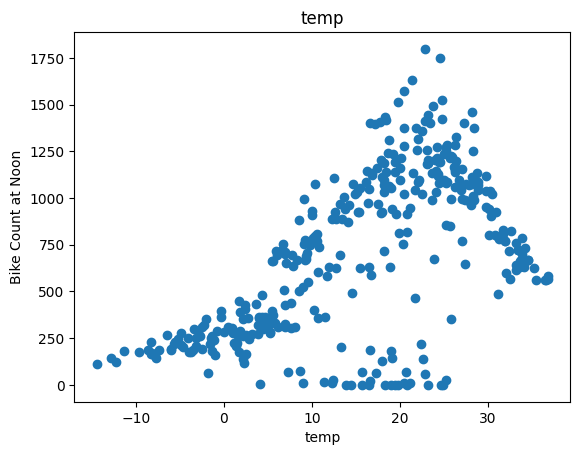

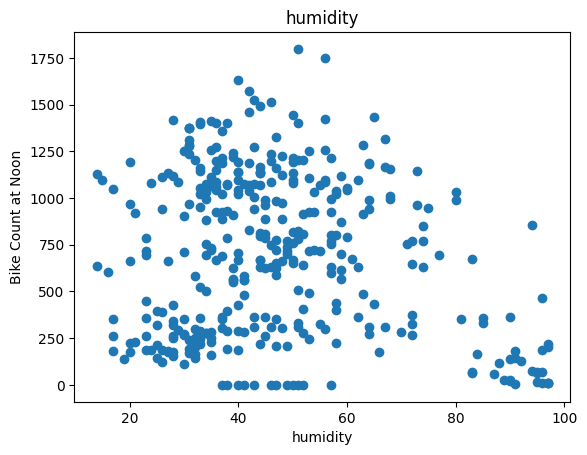

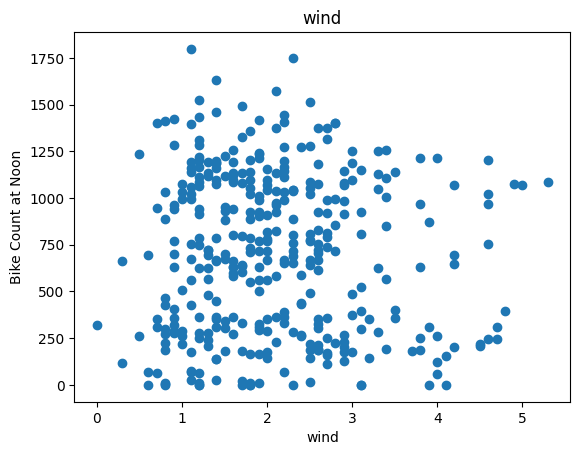

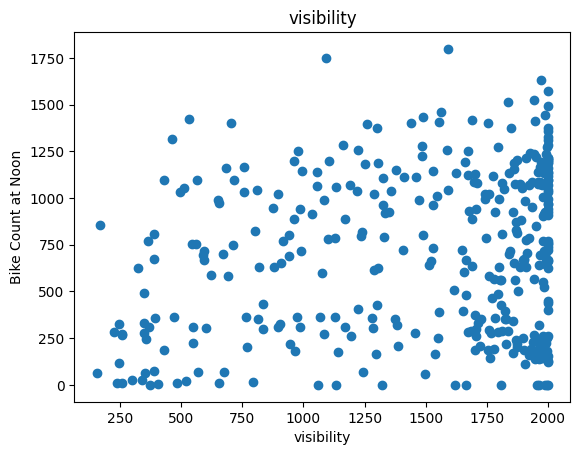

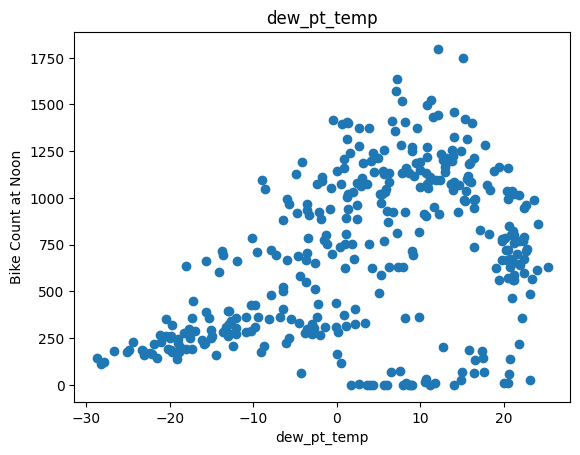

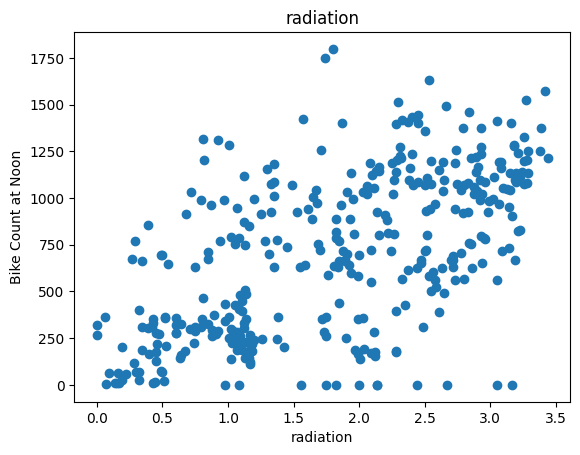

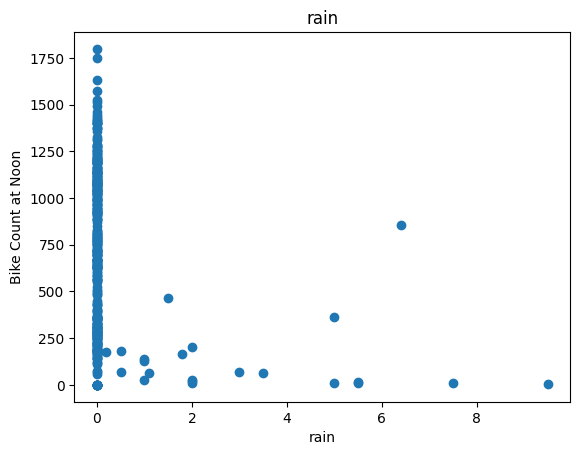

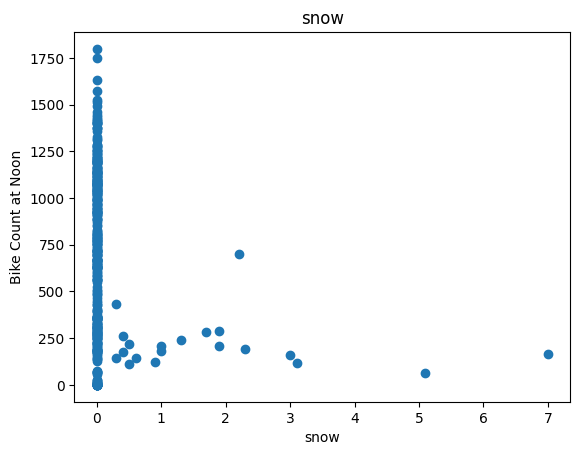

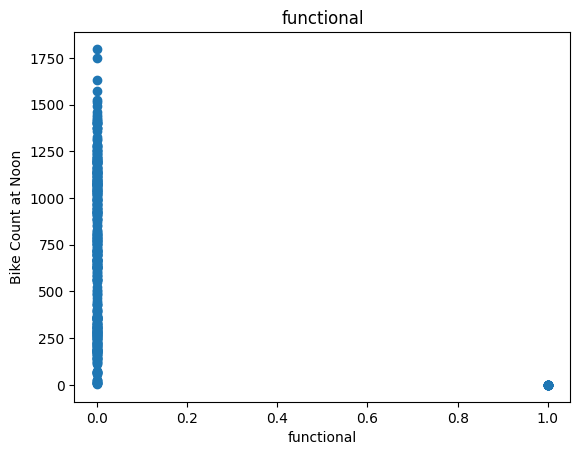

In [53]:
for label in df.columns[1:]:
  plt.scatter(df[label], df["bike_count"])
  plt.title(label)
  plt.ylabel("Bike Count at Noon")
  plt.xlabel(label)
  plt.show()


In [54]:
df = df.drop(["wind","visibility","functional"], axis = 1)
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


# Train/Test/Validation

In [56]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)),int(0.8*len(df))])


In [65]:
def get_xy(dataframe,y_label,x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if len(x_labels)==1:
      X = dataframe[x_labels[0]].values.reshape(-1,1)
    else:
      X = dataframe[x_labels].values

  y = dataframe[y_label].values.reshape(-1,1)
  data = np.hstack((X,y))

  return data, X, y

In [67]:
_, X_train_temp,y_train_temp = get_xy(train,"bike_count",x_labels=["temp"])
_, X_val_temp,y_val_temp = get_xy(val,"bike_count",x_labels=["temp"])
_, X_test_temp,y_test_temp = get_xy(test,"bike_count",x_labels=["temp"])

In [58]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp,y_train_temp)

LinearRegression()

In [59]:
print(temp_reg.coef_,temp_reg.intercept_)

[[21.78608133]] [343.95733483]


In [60]:
temp_reg.score(X_test_temp,y_test_temp)

0.20223819042779545

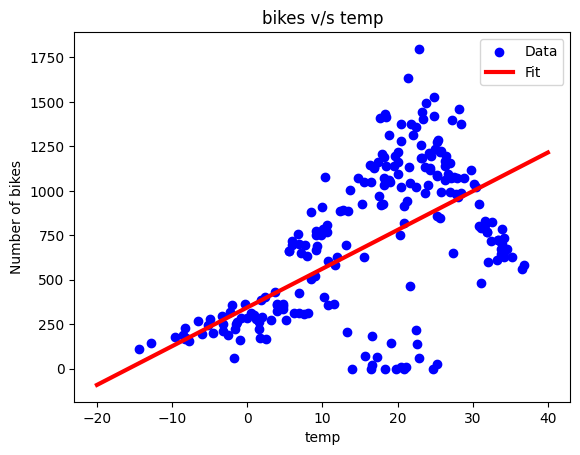

In [68]:
plt.scatter(X_train_temp,y_train_temp,label="Data",color = "blue")
x = tf.linspace(-20,40,100)
plt.plot(x,temp_reg.predict(np.array(x).reshape(-1,1)), label = "Fit", color = "red",linewidth=3)
plt.legend()
plt.title("bikes v/s temp")
plt.ylabel("Number of bikes")
plt.xlabel("temp")
plt.show()


#Multiple Linear Regression

In [69]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)),int(0.8*len(df))])
_, X_train_all,y_train_all = get_xy(train,"bike_count",x_labels = df.columns[1:])
_, X_val_all,y_val_all = get_xy(val,"bike_count",x_labels = df.columns[1:])
_, X_test_all,y_test_all = get_xy(test,"bike_count",x_labels = df.columns[1:])

In [70]:
all_reg = LinearRegression()
all_reg.fit(X_train_all,y_train_all)

LinearRegression()

In [83]:
all_reg.score(X_test_all,y_test_all)

0.4550627779719232

In [123]:
y_pred_lr=all_reg.predict(X_test_all)

# Regression with Neural Network

In [73]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,),axis = None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

In [75]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [76]:
temp_nn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),loss='mean_squared_error')

In [78]:
history = temp_nn_model.fit(
    X_train_temp.reshape(-1), y_train_temp,
    verbose=0,
    epochs=1000,
    validation_data= (X_val_temp,y_val_temp)
)

In [79]:
def plot_loss(history):
  plt.plot(history.history['loss'],label='loss')
  plt.plot(history.history['val_loss'],label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

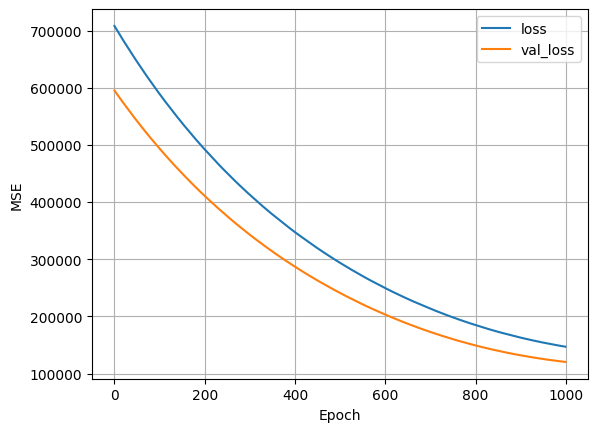

In [80]:
plot_loss(history)

4/4 [==============================] - 0s 4ms/step


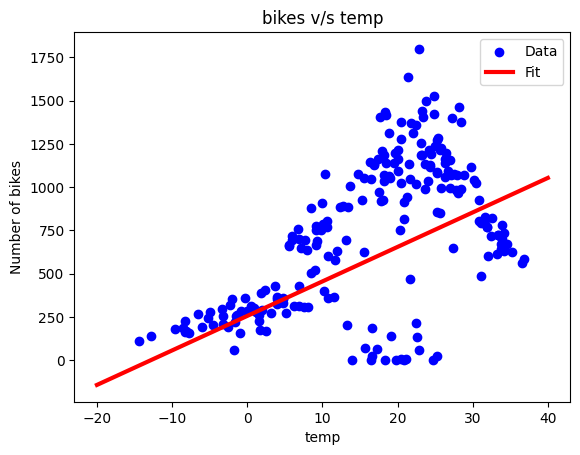

In [82]:
plt.scatter(X_train_temp,y_train_temp,label="Data",color = "blue")
x = tf.linspace(-20,40,100)
plt.plot(x,temp_nn_model.predict(np.array(x).reshape(-1,1)), label = "Fit", color = "red",linewidth=3)
plt.legend()
plt.title("bikes v/s temp")
plt.ylabel("Number of bikes")
plt.xlabel("temp")
plt.show()

# Neural Network

In [115]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,),axis = None)
temp_normalizer.adapt(X_train_temp.reshape(-1))
nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1,)
])
nn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),loss='mean_squared_error')

In [116]:
history = nn_model.fit(
    X_train_temp, y_train_temp,
    verbose=0,
    epochs=100,
    validation_data= (X_val_temp,y_val_temp)
)

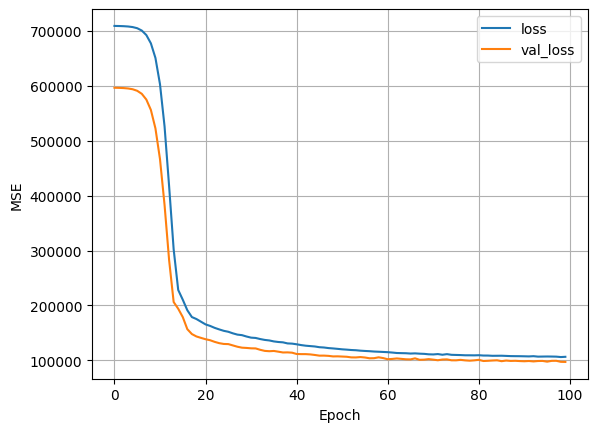

In [117]:
plot_loss(history)

4/4 [==============================] - 0s 5ms/step


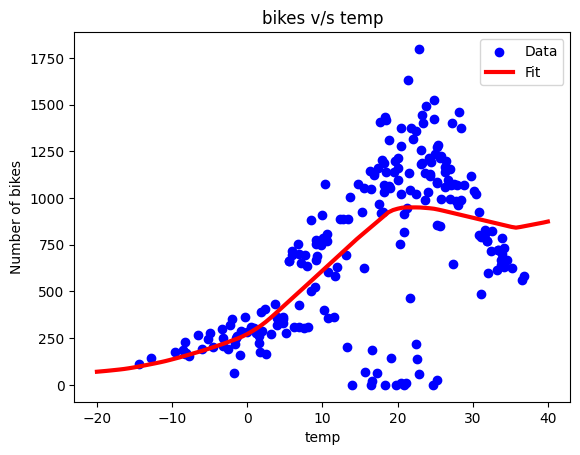

In [118]:
plt.scatter(X_train_temp,y_train_temp,label="Data",color = "blue")
x = tf.linspace(-20,40,100)
plt.plot(x,nn_model.predict(np.array(x).reshape(-1,1)), label = "Fit", color = "red",linewidth=3)
plt.legend()
plt.title("bikes v/s temp")
plt.ylabel("Number of bikes")
plt.xlabel("temp")
plt.show()

In [129]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(6,),axis=-1)
all_normalizer.adapt(X_train_all)

In [130]:
nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1,)
])
nn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),loss='mean_squared_error')

In [131]:
history = nn_model.fit(
    X_train_all, y_train_all,
    verbose=0,
    epochs=100,
    validation_data= (X_val_all,y_val_all)
)

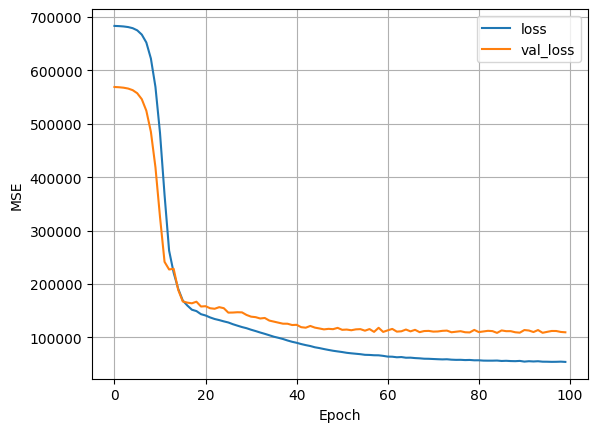

In [132]:
plot_loss(history)

In [133]:
y_pred_lr=all_reg.predict(X_test_all)
y_pred_nn=nn_model.predict(X_test_all)

3/3 [==============================] - 0s 3ms/step


In [134]:
def MSE(y_pred,y_real):
  return (np.square(y_pred-y_real)).mean()

In [135]:
MSE(y_pred_lr,y_test_all)

103521.68316514797

In [136]:
MSE(y_pred_nn,y_test_all)

79310.46525835246

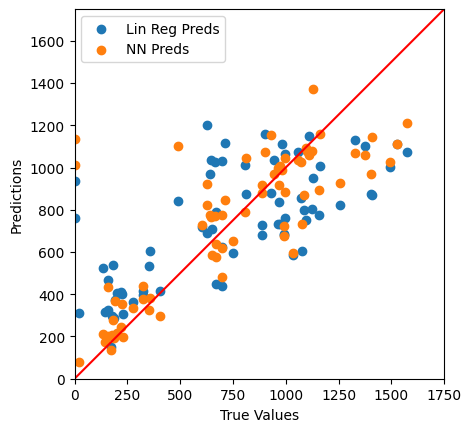

In [142]:
ax = plt.axes(aspect="equal")
plt.scatter(y_test_all,y_pred_lr,label="Lin Reg Preds")
plt.scatter(y_test_all,y_pred_nn,label="NN Preds")
plt.xlabel("True Values")
plt.ylabel("Predictions")
lims=[0,1750]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_ = plt.plot(lims,lims,c="red") # plot a diagonal red line for reference